TF-IDF in scikit-learn and Gensim
==================================

In a large text corpus, some words will be very present (e.g. "the", "a", "is" in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the raw count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms. In other words, frequent words may not provide descriminative or similarity information for 

- scoring/ranking documents with regard to a query document, in the context of information retrieval used in search engines;
- separating documents into different categories, in the context of documen classification (sentiment detection, spam detection). 

In this lab, we will focus on document classification. In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.

TF-IDF was originally a term weighting scheme developed for information retrieval (as a ranking function for search engines results) that has also found good use in document classification and clustering.

:::{admonition} Term Frequency
:class: dropdown
Denoted $tf_{d,t}$, which means term-frequency of term $t$ in document $d$, is the number of times term term $t$ occurs in document $d$.
:::

:::{admonition} Document Frequency
:class: dropdown
Denoted $df_{t}$, which means the number of times that term $t$ occurs across the entire collection of documents (i.e. corpus). It is a value specific to each term but not specific to each document. 
:::

:::{admonition} Inverse Document Frequency
:class: dropdown
Denoted $idf_{t}$, which is defined as 

$$idf_t = \log_2\frac{N}{df_t}$$

where $N$ is total number of documents in the collection. It is a value specific to each term but not specific to each document. 
:::

TF-IDF is the term frequency discounted by the document freqency. In other words, a frequent term in a document needs to be infrequent across documents to acquire a high tf-idf value. There are several variations of TF-IDF implementations. Gensim's implementation is more closer to the original definition. scikit-learn's implementation normalises the resulting vector to ensure the values are between 0 and 1, which is better for classification tasks. 


In [13]:
text = ["It was the best of times",
"it was the worst of times",
"it was the age of wisdom",
"it was the age of foolishness"]


## TF-IDF in Gensim 

[Gensim](https://radimrehurek.com/gensim/) is yet another popular libray specialising in statistical analysis of natural language text, in particular useful for Topic Modelling, which we will cover later in the unit.  

:::{note}
You will need to activate the cits4012_py37 environment to use gensim. 
:::

In [14]:
import gensim
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

### Step 1: Preprocessing
Gensim has a different routine in preparing text. It uses `gensim.utils.simple_preprocess()` to tokenise while removing punctuation and turn the tokens into lower cases. 

In [15]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

### Step 2: Create a corpus with counts

Gensim has a built-in class `gensim.corpora.Dictionary` that has a function `doc2bow` that implements the bag of words idea, which processes the document collection, assigning an id to each unique token, while counting the term frequency of each token in each document. The following code returns each document as a list of tuples, in the form of `(term_id, count)`

In [16]:
doc_tokenized = list(sent_to_words(text))
dictionary = Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]
BoW_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(1, 1), (2, 1), (3, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (2, 1), (3, 1), (5, 1), (7, 1), (9, 1)]]

We can examine the Bag of Words corpus obtained. You can think of the dictionary object is a vocabulary of the collection, mapping a term id to its lexical form (i.e. the word form) of the term. 

In [17]:
for doc in BoW_corpus:
   print([[dictionary[id], freq] for id, freq in doc])

[['best', 1], ['it', 1], ['of', 1], ['the', 1], ['times', 1], ['was', 1]]
[['it', 1], ['of', 1], ['the', 1], ['times', 1], ['was', 1], ['worst', 1]]
[['it', 1], ['of', 1], ['the', 1], ['was', 1], ['age', 1], ['wisdom', 1]]
[['it', 1], ['of', 1], ['the', 1], ['was', 1], ['age', 1], ['foolishness', 1]]


### Step 3: Calculating the tfidf values

A [`gensim.models.TfidfModel`](https://radimrehurek.com/gensim/models/tfidfmodel.html) object can be constructed using the processed BoW corpus. The `smartirs` parameter stands for SMART information retrieval system, where SMART is an acronym for "System for the Mechanical Analysis and Retrieval of Text". If interested, you can read more about [SMART on Wikipedia](https://en.wikipedia.org/wiki/SMART_Information_Retrieval_System), which contains a rather comprehensive list of TF-IDF variants.  `smartirs = ntc` means the model will use `n` raw term freqency, `t` zero-corrected idf, and `c` cosine for document vector nomalisation. For a list of other letter codes for each of the three tf-idf components, see the tabs or refer to the [original documentation](https://radimrehurek.com/gensim/models/tfidfmodel.html). You do not need to memorise all these variants, but just be aware of the many alternatives in calculating such a seemingly simple value. You can even define your own way of calculating tf and idf to feed into the model constructor. 

:::{tabbed} Term frequency weighing
- b - binary,
- t or n - raw,
- a - augmented,
- l - logarithm,
- d - double logarithm,
- L - log average.
:::

:::{tabbed} Document frequency weighting
- x or n - none,
- f - idf,
- t - zero-corrected idf,
- p - probabilistic idf.
::: 

:::{tabbed} Document normalization
- x or n - none,
- c - cosine,
- u - pivoted unique,
- b - pivoted character length.

### Example Code

In [28]:
import numpy as np
tfidf = TfidfModel(BoW_corpus, smartirs='ntc')

# Get the tfidf vector representation of the second sentence
tfidf[BoW_corpus[1]]

[(1, 0.11713529839512132),
 (2, 0.11713529839512132),
 (3, 0.11713529839512132),
 (4, 0.48099076877929253),
 (5, 0.11713529839512132),
 (6, 0.8448462391634637)]

In [30]:
# Get the tfidf transformed corpus, 
# then the vector of the second sentence.
tfidf[BoW_corpus][1]

[(1, 0.11713529839512132),
 (2, 0.11713529839512132),
 (3, 0.11713529839512132),
 (4, 0.48099076877929253),
 (5, 0.11713529839512132),
 (6, 0.8448462391634637)]

In [31]:
# Now a friendlier print out
for doc in tfidf[BoW_corpus]:
   print([[dictionary[id], np.around(freq,decimals=2)] for id, freq in doc])

[['best', 0.84], ['it', 0.12], ['of', 0.12], ['the', 0.12], ['times', 0.48], ['was', 0.12]]
[['it', 0.12], ['of', 0.12], ['the', 0.12], ['times', 0.48], ['was', 0.12], ['worst', 0.84]]
[['it', 0.12], ['of', 0.12], ['the', 0.12], ['was', 0.12], ['age', 0.48], ['wisdom', 0.84]]
[['it', 0.12], ['of', 0.12], ['the', 0.12], ['was', 0.12], ['age', 0.48], ['foolishness', 0.84]]


### How do we get the document-term matrix

In [36]:
vocab = [dictionary[i] for i in range(len(dictionary))]
vocab

['best',
 'it',
 'of',
 'the',
 'times',
 'was',
 'worst',
 'age',
 'wisdom',
 'foolishness']

In [43]:
index = list(range(len(BoW_corpus)))
index

[0, 1, 2, 3]

In [92]:
import pandas as pd
df = pd.DataFrame(data=np.zeros((len(BoW_corpus), len(vocab)), dtype=np.float16),
                  index=index,
                  columns=vocab)


In [90]:
for idx in index:
    for id, freq in tfidf[BoW_corpus[idx]]:
        df[dictionary[id]][idx] = freq

In [91]:
df

,best,it,of,the,times,was,worst,age,wisdom,foolishness
0,0.844727,0.117126,0.117126,0.117126,0.480957,0.117126,0.844727,0.480957,0.844727,0.844727
1,5.000000,0.117126,0.117126,0.117126,0.480957,0.117126,0.844727,0.000000,0.000000,0.000000
2,0.000000,0.117126,0.117126,0.117126,0.000000,0.117126,0.000000,0.480957,0.844727,0.000000
3,0.000000,0.117126,0.117126,0.117126,0.000000,0.117126,0.000000,0.480957,0.000000,0.844727


## TF-IDF in scikit-learn

In scikit-learn, the TF-IDF is caculated using the `TfidfTransformer`. Its default settings, `TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)` the term frequency, the number of times a term occurs in a given document, is multiplied with idf component, which is computed as

:::{tabbed} TF-IDF with `smooth_idf=True`
$$idf_t = \log_2\frac{1+n}{1+df_t} + 1$$ 

The default parameter `smooth_idf=True` adds "1" to the numerator and denominator as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions.
:::
:::{tabbed} TF-IDF with `smooth_idf=False`
$$idf_t = \log_2\frac{n}{df_t} + 1$$

With `smooth_idf=False`, the "1" count is added to the idf instead of the idf's denominator:
:::  

Then the resulting tf-idf vectors are then normalized by the Euclidean norm

$$ v_{norm} = \frac{v}{||v||} = \frac{v}{\sqrt{v_1^2 + ... + v_n^2}}$$ 

See [scikit-learn Documenation on Feature Extraction (Section 6.2.3.4)](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) for more details.

### [`TfidfTransformer` vs `TfidfVectorizer`](https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.YRN0KI4zYuU)

With `TfidfTransformer` you will systematically compute word counts using `CountVectorizer` and then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores.

With `TfidfVectorizer` on the contrary, you will do all three steps at once. Under the hood, it computes the word counts, IDF values, and Tf-idf scores all using the same dataset.

Use `TfidfTransformer` if you need to obtain term frequency (i.e. term counts). We will illustrate the TF-IDF calculation using `TfidfVectorizer` in this notebook and `TfidfTransformer` in the classification notebook after this. 

### Example Code

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(text).toarray()
tfidf

array([[0.        , 0.60735961, 0.        , 0.31694544, 0.31694544,
        0.31694544, 0.4788493 , 0.31694544, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.31694544, 0.31694544,
        0.31694544, 0.4788493 , 0.31694544, 0.        , 0.60735961],
       [0.4788493 , 0.        , 0.        , 0.31694544, 0.31694544,
        0.31694544, 0.        , 0.31694544, 0.60735961, 0.        ],
       [0.4788493 , 0.        , 0.60735961, 0.31694544, 0.31694544,
        0.31694544, 0.        , 0.31694544, 0.        , 0.        ]])

In [7]:
import numpy as np
# Define labels for the x and y axis
nrows = np.shape(tfidf)[0]
xlabels = tfidf_vectorizer.get_feature_names()
ylabels = ['D' + str(idx) for idx in list(np.arange(nrows))]

['D0', 'D1', 'D2', 'D3']

In [8]:
xlabels

['age',
 'best',
 'foolishness',
 'it',
 'of',
 'the',
 'times',
 'was',
 'wisdom',
 'worst']

In [9]:
ylabels

['D0', 'D1', 'D2', 'D3']

<ipython-input-10-4c5527a74677>:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


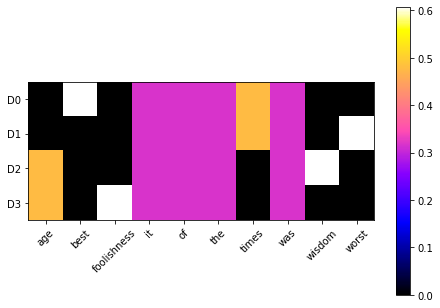

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.axes([0, 0, 1, 1])
plt.imshow(tfidf, interpolation='nearest', 
          cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(len(xlabels)), xlabels, rotation=45)
plt.yticks(range(nrows), ylabels)
plt.colorbar()
plt.tight_layout()
plt.show()

Note, this is a document-term matrix, with tf-idf values for each cell, not a similarity or distance plot. 

:::{admonition} Your Turn
You can refer to the code for word similarity from word occurrence matrix to work out the similarities between these documents. 
:::